In [1]:
from sklearn.metrics import roc_curve

In [2]:
def get_binary_preds_by_threshold(y_pred, threshold):
    binary_preds = []
    for y in y_pred:
        if y >= threshold:
            binary_preds.append(1)
        else:
            binary_preds.append(0)
    return binary_preds

In [3]:
def get_tpr(y_binary_pred, y_true):
    divider = y_true.count(1)
    true_positives = list(zip(y_binary_pred, y_true)).count((1, 1))
    return true_positives / divider

In [4]:
def get_fpr(y_binary_pred, y_true):
    divider = y_true.count(0)
    true_negatives = list(zip(y_binary_pred, y_true)).count((1, 0))
    return true_negatives / divider

In [5]:
def sort_by_preds(y_true, y_pred):
    y_true_sorted = []
    y_pred_sorted = []
    
    for p, t in sorted(zip(y_pred, y_true)):
        y_true_sorted.append(t)
        y_pred_sorted.append(p)
    
    return y_true_sorted, y_pred_sorted

In [6]:
def get_tpr_fpr(pred_sorted, true_sorted):
    list_of_tpr = []
    list_of_fpr = []

    for prob in pred_sorted:
        current_y_pred = get_binary_preds_by_threshold(pred_sorted, threshold=prob)
        current_tpr = get_tpr(current_y_pred, true_sorted)
        current_fpr = get_fpr(current_y_pred, true_sorted)
        list_of_tpr.append(current_tpr)
        list_of_fpr.append(current_fpr)
    
    return list_of_tpr, list_of_fpr

In [2]:
probs = [0.5, 0.1, 0.2, 0.6, 0.2, 0.3, 0.0]
y = [0, 0, 0, 1, 1, 1, 0]

In [8]:
y_sorted, probs_sorted = sort_by_preds(y, probs)

In [9]:
list_of_tpr, list_of_fpr = get_tpr_fpr(probs_sorted, y_sorted)

In [10]:
list_of_tpr

[1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333]

In [11]:
list_of_fpr

[1.0, 0.75, 0.5, 0.5, 0.25, 0.25, 0.0]

In [12]:
probs_sorted

[0.0, 0.1, 0.2, 0.2, 0.3, 0.5, 0.6]

In [17]:
current_y_pred = get_binary_preds_by_threshold(probs_sorted, 0.25)

In [18]:
current_y_pred

[0, 0, 0, 0, 1, 1, 1]

In [19]:
current_tpr = get_tpr(current_y_pred, y_sorted)
current_fpr = get_fpr(current_y_pred, y_sorted)

In [20]:
current_tpr

0.6666666666666666

In [21]:
current_fpr

0.25

In [22]:
import matplotlib.pyplot as plt

In [26]:
list_of_tpr.append(0.0)
list_of_fpr.append(0.0)
probs_sorted.append(1.1)

In [29]:
list_of_fpr

[1.0, 0.75, 0.5, 0.5, 0.25, 0.25, 0.0, 0.0]

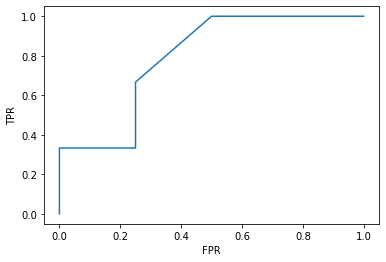

In [28]:
plt.plot(list_of_fpr, list_of_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [9]:
from sklearn.metrics import RocCurveDisplay, auc

In [59]:
fpr, tpr, thresholds = roc_curve(y, probs)

In [60]:
fpr

array([0.  , 0.  , 0.25, 0.25, 0.5 , 1.  ])

In [61]:
tpr

array([0.        , 0.33333333, 0.33333333, 0.66666667, 1.        ,
       1.        ])

In [62]:
thresholds

array([1.6, 0.6, 0.5, 0.3, 0.2, 0. ])

In [63]:
roc_auc = auc(fpr, tpr)

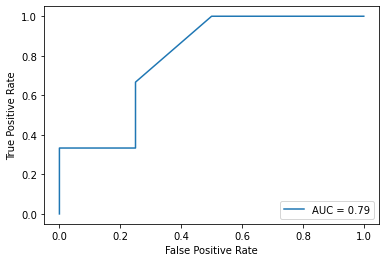

In [64]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

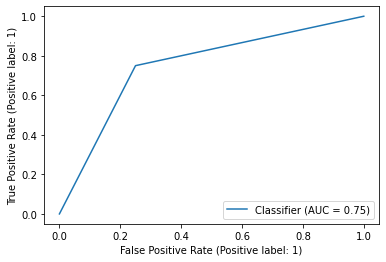

In [31]:
RocCurveDisplay.from_predictions([0, 1, 1, 1, 0, 0, 0, 1], [0, 1, 0, 1, 0, 1, 0, 1])